#  Digital and Social Media Marketing
## Curated By - Paritosh Sinha

### Install and Import necessary packages


In [85]:
!pip install praw

In [86]:
# Reddit API wrapper
import praw

# Data analysis and manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

# Natural language processing
import nltk
nltk.download('stopwords')

# Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Reddit Client-Agent details

In [87]:
#Client_id, client_secret, client_secret details

reddit = praw.Reddit(
    client_id="aQRuHmR1bkshE-PjcozlJA",
    client_secret="GH3Vv4gerktlOYXdCPkgCflx4apfCw",
    user_agent="DSMA-Scrapping",
    check_for_async=False)

### Getting subreddit details

In [88]:
#Function to extract post from reddit and keep the extracted data into a dataframe for further manipulation and study

def get_posts(subred_name, n):
    subreddit = reddit.subreddit(subred_name)
    posts_info = []

    for subm in subreddit.top(limit=n):
        subred_info = []
        subred_info.append(subm.id)
        subred_info.append(str(subm.author))
        subred_info.append(subm.score)
        subred_info.append(subm.upvote_ratio)
        subred_info.append(subm.num_comments)
        subred_info.append(subm.subreddit)
        subred_info.append(subm.title)  # Include title

        # Check if it's a text post or other type (e.g., link, image)
        if subm.is_self:
            subred_info.append(subm.selftext)  # Include text for text posts
        else:
            subred_info.append("")  # If it's not a text post, add an empty string for text

        subred_info.append(subm.link_flair_text)  # Include link_flair_text
        posts_info.append(subred_info)

    sorted_info = sorted(posts_info, key=lambda x: x[1], reverse=True)
    posts_df = pd.DataFrame(sorted_info, columns=['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit', 'title', 'text', 'link_flair_text'])
    return posts_df




#### Topic : AppleWatch

In [89]:
#Making a call to the function with subreddit as AppleWatch

subred_df = get_posts('AppleWatch', 1000)
subred_df.head()

,id,author,score,upvote_ratio,num_comments,subreddit,title,text,link_flair_text
0,cx5xw0,zoomfokus,1757,0.97,248,AppleWatch,Event confirmed!,,My Watch
1,nntbf0,zekerosh,4529,0.99,76,AppleWatch,the future is now,,Meme
2,jp1as2,z-angel-z,1729,0.97,99,AppleWatch,Lol Apple changed the Watch app icon to includ...,,Discussion
3,jylhb3,yuhki0,1317,0.95,156,AppleWatch,"So on the day of launch of the 12 Pro Max, I a...",,Discussion
4,fczvif,yuan_yy,1288,0.98,47,AppleWatch,Oh that’s going to be real difficult,,Activity


In [90]:
# Checking for the unique entries in the data extracted

unique_entries_count = subred_df.nunique()
print(unique_entries_count)

total_unique_entries = subred_df.nunique().sum()
print("Total Unique Entries:", total_unique_entries)

id                 1000
author              863
score               746
upvote_ratio         19
num_comments        272
subreddit             1
title               997
text                 38
link_flair_text      28
dtype: int64
Total Unique Entries: 3964


In [91]:
#Copying into another df for manipulations
df = subred_df
df.head()

,id,author,score,upvote_ratio,num_comments,subreddit,title,text,link_flair_text
0,cx5xw0,zoomfokus,1757,0.97,248,AppleWatch,Event confirmed!,,My Watch
1,nntbf0,zekerosh,4529,0.99,76,AppleWatch,the future is now,,Meme
2,jp1as2,z-angel-z,1729,0.97,99,AppleWatch,Lol Apple changed the Watch app icon to includ...,,Discussion
3,jylhb3,yuhki0,1317,0.95,156,AppleWatch,"So on the day of launch of the 12 Pro Max, I a...",,Discussion
4,fczvif,yuan_yy,1288,0.98,47,AppleWatch,Oh that’s going to be real difficult,,Activity


## **Influencers**

Text(0, 0.5, 'Number of posts')

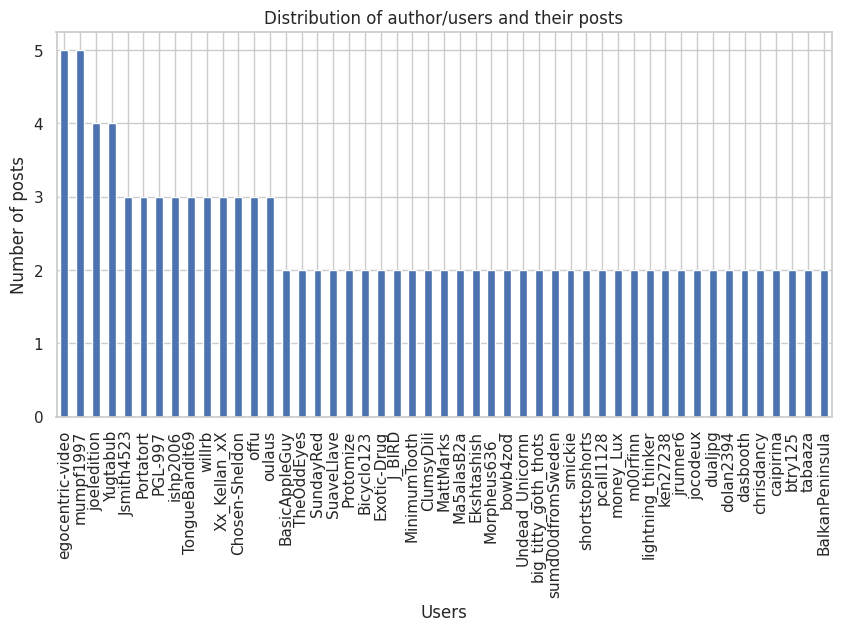

In [92]:
# Frequent authors for this topic on reddit

freq_authors = df[df.duplicated(['author'], keep = False)]
freq_authors = freq_authors[freq_authors.author != 'None']

freq_authors.author.nunique()

#Graph to see which user have posted on the subreddit
plt.figure(figsize=(10, 5))
ax = freq_authors['author'].value_counts().plot(kind='bar',title='Distribution of author/users and their posts')
ax.set_xlabel("Users")
ax.set_ylabel("Number of posts")

<Figure size 1500x700 with 0 Axes>

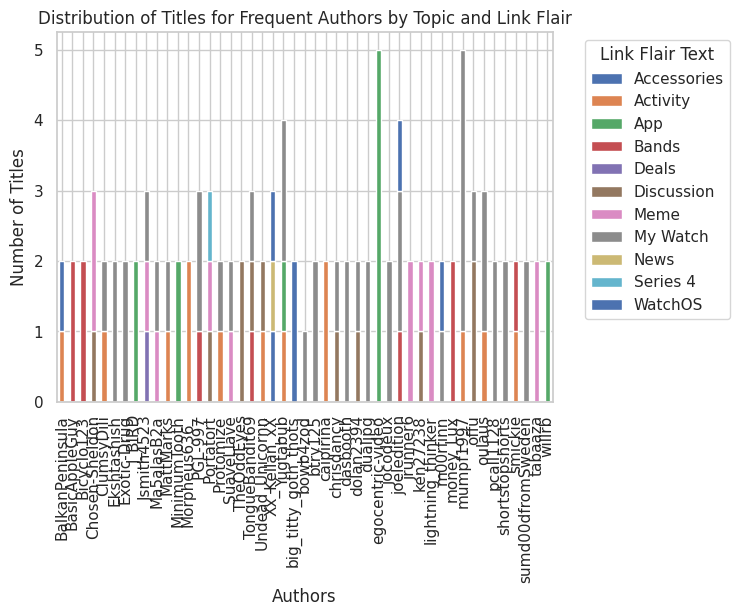

In [93]:
# Count of posts per author and topic based on link flair text
posts_per_author_topic_flair = freq_authors.groupby(['author', 'link_flair_text'])['title'].count()

# Plot the distribution of titles for each author and topic based on link flair text
plt.figure(figsize=(15, 7))
ax = posts_per_author_topic_flair.unstack().plot(kind='bar', stacked=True, title='Distribution of Titles for Frequent Authors by Topic and Link Flair')
ax.set_xlabel("Authors")
ax.set_ylabel("Number of Titles")
plt.legend(title='Link Flair Text', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


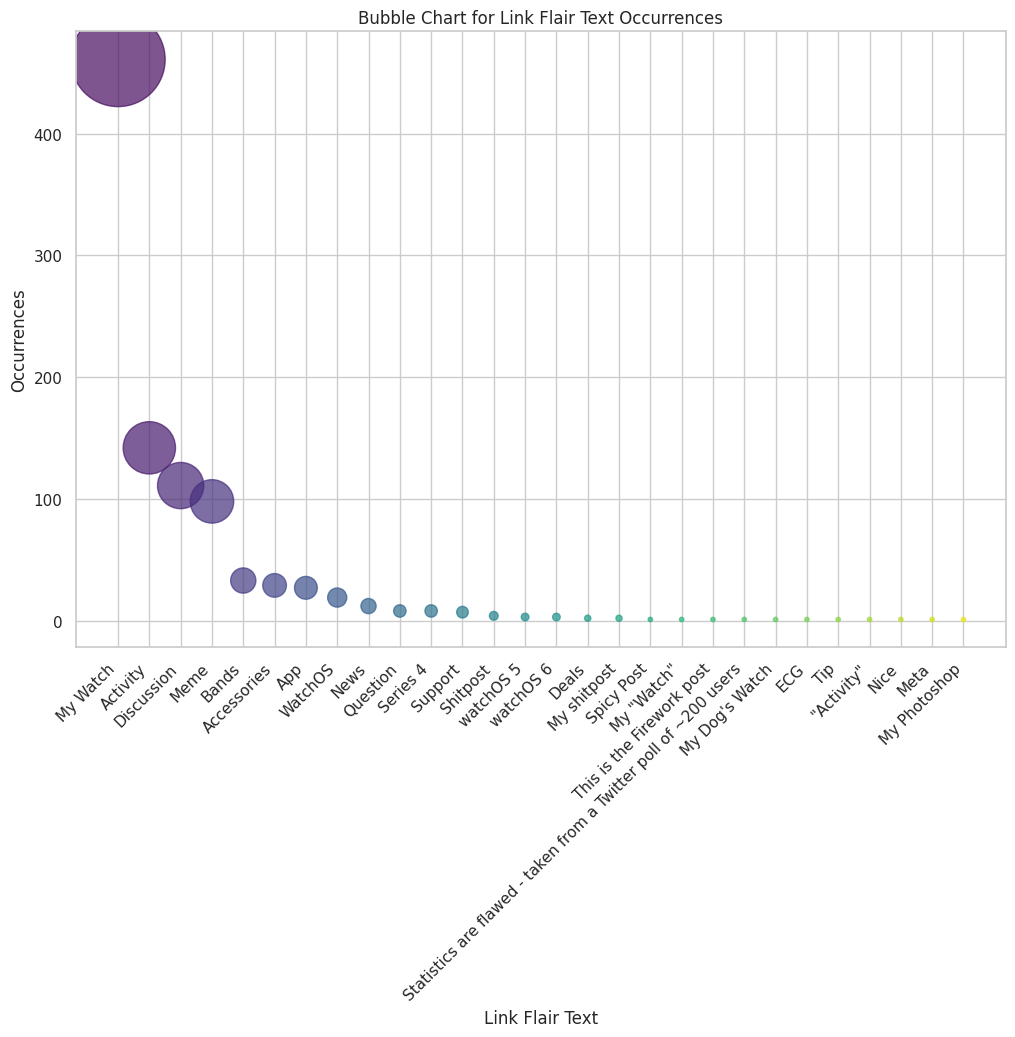

In [94]:
#To understand on which topic are the users most active on
# Count occurrences of each link flair text
link_flair_counts = df['link_flair_text'].value_counts()

# Create a color palette
colors = sns.color_palette('viridis', len(link_flair_counts))

# Create a bubble chart with different colors for each link flair text
plt.figure(figsize=(12, 8))
plt.scatter(link_flair_counts.index, link_flair_counts.values, s=link_flair_counts.values * 10, alpha=0.7, c=colors)
plt.title('Bubble Chart for Link Flair Text Occurrences')
plt.xlabel('Link Flair Text')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()



               author  num_comments
548  egocentric-video           866
721       nosypumpkin           831
764    reclusedesigns           742
726              offu           722
85         Constant-K           708


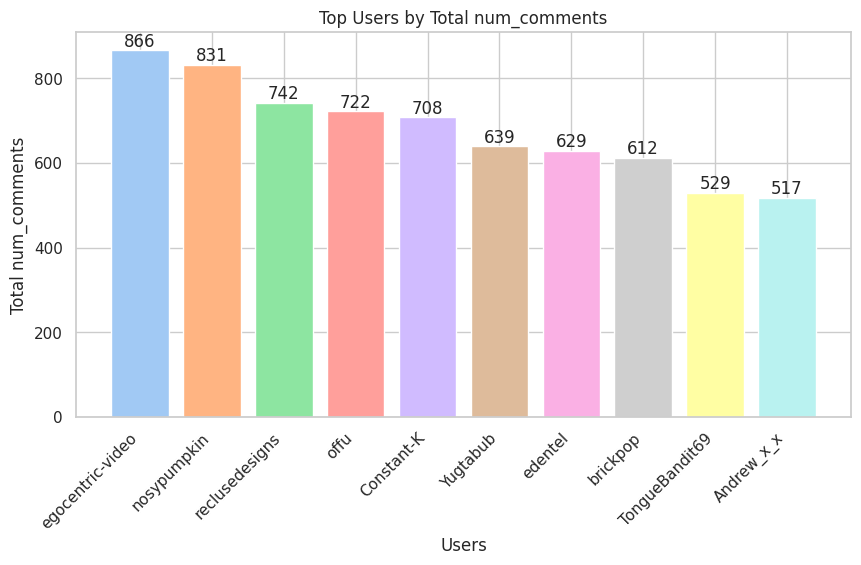

In [95]:
# To understand how active the users are
# Grouping by author and calculating the total num_comments made by each user
user_comment_counts = df.groupby('author')['num_comments'].sum().reset_index()

# Replace 'None' with NaN and drop those rows
user_comment_counts = user_comment_counts.replace('None', np.nan).dropna()

# Sorting the DataFrame by num_comments in descending order
user_comment_counts = user_comment_counts.sort_values(by='num_comments', ascending=False)

# Displaying the top users and their total num_comments
print(user_comment_counts.head())

# Set a color palette
colors = sns.color_palette("pastel", len(user_comment_counts))

# Plotting a bar chart for the top users and their total num_comments with different colors
plt.figure(figsize=(10, 5))
bars = plt.bar(user_comment_counts['author'][:10], user_comment_counts['num_comments'][:10], color=colors)

# Display numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Users')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total num_comments')
plt.title('Top Users by Total num_comments')
plt.show()

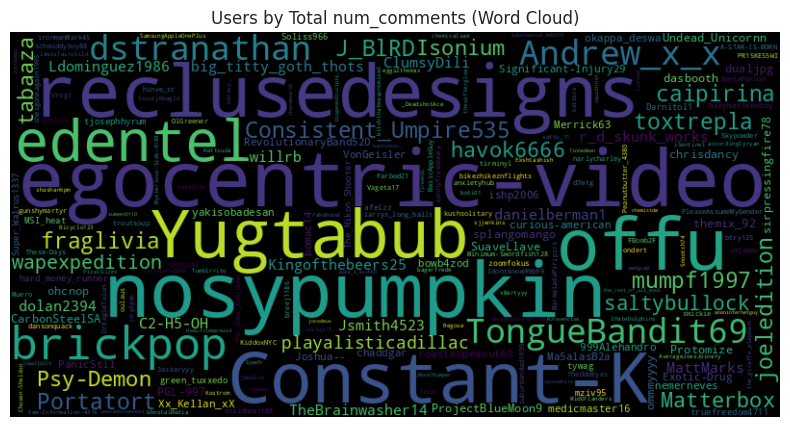

In [96]:
# Convert user_comment_counts to a dictionary for WordCloud input
user_comments_dict = dict(zip(user_comment_counts['author'], user_comment_counts['num_comments']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(user_comments_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Users by Total num_comments (Word Cloud)')
plt.show()



In [97]:
# Extract the columns to be normalized
columns_to_normalize = ['score', 'upvote_ratio', 'num_comments']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [98]:
df

,id,author,score,upvote_ratio,num_comments,subreddit,title,text,link_flair_text
0,cx5xw0,zoomfokus,0.048201,0.904762,0.283784,AppleWatch,Event confirmed!,,My Watch
1,nntbf0,zekerosh,0.264055,1.000000,0.072482,AppleWatch,the future is now,,Meme
2,jp1as2,z-angel-z,0.046021,0.904762,0.100737,AppleWatch,Lol Apple changed the Watch app icon to includ...,,Discussion
3,jylhb3,yuhki0,0.013939,0.809524,0.170762,AppleWatch,"So on the day of launch of the 12 Pro Max, I a...",,Discussion
4,fczvif,yuan_yy,0.011680,0.952381,0.036855,AppleWatch,Oh that’s going to be real difficult,,Activity
...,...,...,...,...,...,...,...,...,...
995,xlbegi,17parkc,0.085656,0.904762,0.060197,AppleWatch,We're going to Candy Mountain Charlie!,,Meme
996,11qsc10,17jde,0.044152,0.857143,0.148649,AppleWatch,Maybe the best investment I ever made! AWU,,My Watch
997,voqd75,129West81stSt,0.029746,0.904762,0.078624,AppleWatch,I suffer from severe anxiety and panic attacks...,,Activity
998,13gj5en,1017Burt,0.098038,0.904762,0.133907,AppleWatch,iPod Nano Case,,Discussion


In [99]:
#highest scores and upvote_ratio against the author and id

df.sort_values(['score', 'upvote_ratio'], ascending = [False, False])[['score', 'upvote_ratio', 'author', 'id']].head(10)

,score,upvote_ratio,author,id
208,1.000000,0.904762,mattmurphy00,jkjo2h
551,0.811789,0.761905,TheBrainwasher14,d2me8f
191,0.742875,1.000000,mnjustesen,gss5ra
477,0.635649,0.904762,akka_bond,v56fwc
285,0.545632,0.952381,ironmanMark45,n0ehle
811,0.528500,1.000000,KYDuck123,m5a2ta
446,0.522738,0.761905,babymanteenboy,yf4ysb
887,0.486451,0.952381,EngineeringDesserts,n39wrm
375,0.416212,0.904762,danielberman1,ix193v
148,0.409360,0.952381,odlonmiro,agtxf0


In [100]:
df.sort_values(['upvote_ratio'], ascending = [False])[['score', 'upvote_ratio', 'author', 'id']].head(10)

,score,upvote_ratio,author,id
500,0.099907,1.0,Xx_Kellan_xX,heiqoj
598,0.206198,1.0,Scolirk,ewxluu
289,0.028890,1.0,ilikebirdsthatfly,k4ayts
290,0.100841,1.0,ilgarbagio,hxzbn9
293,0.055910,1.0,idontweargoggles,inkpga
138,0.056066,1.0,oneillbp,kob9vo
296,0.099751,1.0,iDiddleKiddos,li2xsf
134,0.010512,1.0,oulaus,m8j0lf
641,0.138296,1.0,Pondy_x,kyjhvp
639,0.038468,1.0,Portatort,v69f9b


In [101]:
df.sort_values(['score'], ascending = [False])[['score', 'upvote_ratio', 'author', 'id']].head(10)

,score,upvote_ratio,author,id
208,1.000000,0.904762,mattmurphy00,jkjo2h
551,0.811789,0.761905,TheBrainwasher14,d2me8f
191,0.742875,1.000000,mnjustesen,gss5ra
477,0.635649,0.904762,akka_bond,v56fwc
285,0.545632,0.952381,ironmanMark45,n0ehle
811,0.528500,1.000000,KYDuck123,m5a2ta
446,0.522738,0.761905,babymanteenboy,yf4ysb
887,0.486451,0.952381,EngineeringDesserts,n39wrm
375,0.416212,0.904762,danielberman1,ix193v
148,0.409360,0.952381,odlonmiro,agtxf0


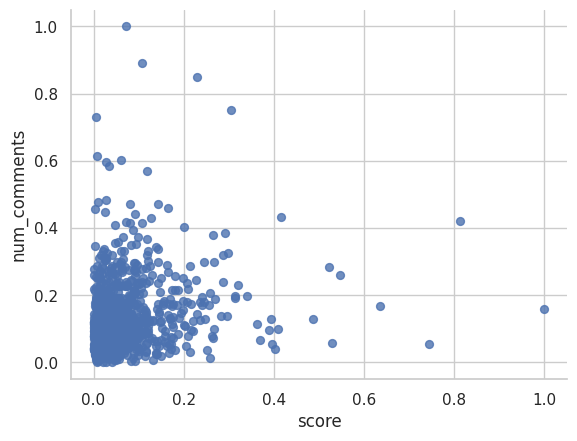

In [102]:
#Plotting the value of scrore vs num_comments to understand working of reddit score algo
df.plot(kind='scatter', x='score', y='num_comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

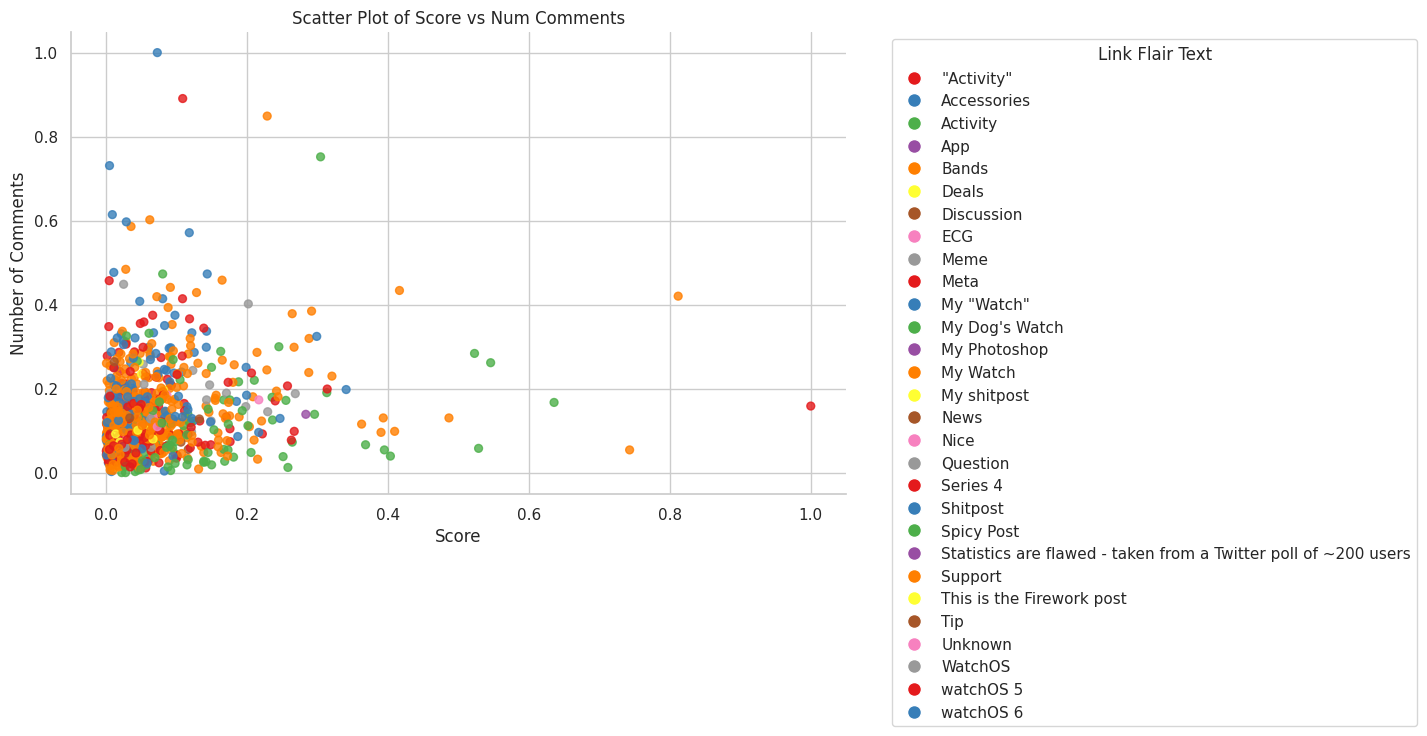

In [103]:
# Scatter plot of scores and num_comments to vizualise link_flair_text in different colours

sns.set(style="whitegrid")

# Using LabelEncoder to convert link_flair_text to numerical labels
label_encoder = LabelEncoder()
df['label_link_flair'] = label_encoder.fit_transform(df['link_flair_text'].astype(str))

# Create a dictionary to map numerical labels to text labels
label_mapping = dict(zip(df['label_link_flair'], df['link_flair_text'].astype(str)))

# Clean up keys in label_mapping dictionary
label_mapping = {str(key): value for key, value in label_mapping.items()}

# Scatter plot with colored dots based on link_flair_text
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x='score', y='num_comments', c='label_link_flair', cmap='Set1', data=df, s=32, alpha=.8)

# Customize the plot
plt.title('Scatter Plot of Score vs Num Comments')
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.gca().spines[['top', 'right']].set_visible(False)

# Add a legend with text labels using unique link_flair_text values
legend_labels = sorted(df['link_flair_text'].astype(str).replace('None', 'Unknown').unique())
colors = sns.color_palette("Set1", len(legend_labels))

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, colors)]

plt.legend(handles=legend_handles, title='Link Flair Text', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

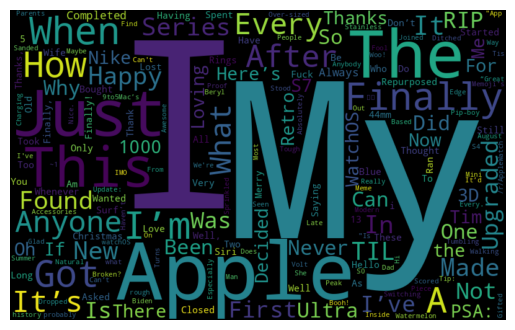

In [104]:
# Get the frequent keywords used words in the title of the posts
most_used_words = df['title'].str.split().str.get(0).value_counts()

# Create a wordcloud
wordcloud = WordCloud(width=800, height=500, random_state=1).generate_from_frequencies(most_used_words)

# Plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


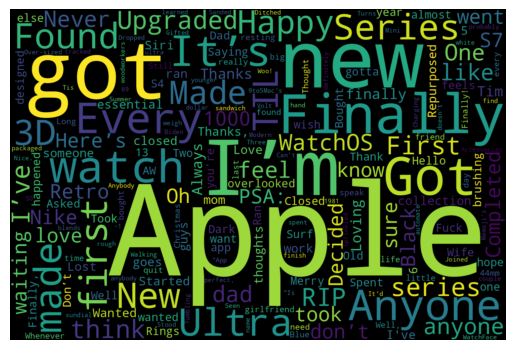

In [105]:
# Get the most used words in the title column after removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
# Combine title and text columns for analysis
df['combined_text'] = df['title'] + ' ' + df['text']
processed_text = df['combined_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
most_used_words = processed_text.str.split().str.get(0).value_counts()

# Create a wordcloud
wordcloud = WordCloud(width=1500, height=1000, random_state=2).generate_from_frequencies(most_used_words)

# Plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [106]:
df.head()

,id,author,score,upvote_ratio,num_comments,subreddit,title,text,link_flair_text,label_link_flair,combined_text
0,cx5xw0,zoomfokus,0.048201,0.904762,0.283784,AppleWatch,Event confirmed!,,My Watch,13,Event confirmed!
1,nntbf0,zekerosh,0.264055,1.000000,0.072482,AppleWatch,the future is now,,Meme,8,the future is now
2,jp1as2,z-angel-z,0.046021,0.904762,0.100737,AppleWatch,Lol Apple changed the Watch app icon to includ...,,Discussion,6,Lol Apple changed the Watch app icon to includ...
3,jylhb3,yuhki0,0.013939,0.809524,0.170762,AppleWatch,"So on the day of launch of the 12 Pro Max, I a...",,Discussion,6,"So on the day of launch of the 12 Pro Max, I a..."
4,fczvif,yuan_yy,0.011680,0.952381,0.036855,AppleWatch,Oh that’s going to be real difficult,,Activity,2,Oh that’s going to be real difficult


#### TF-IDF Vectorization performed on Combined Text
#### Dimensionality Reduction with  Truncated Singular Value Decomposition
#### K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


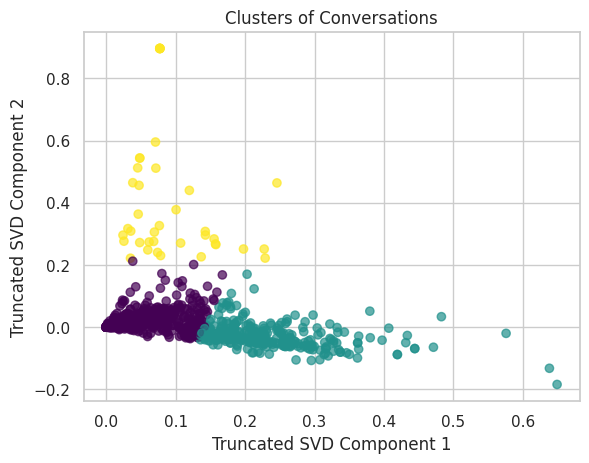

                                                 title  cluster
0                                     Event confirmed!        0
1                                    the future is now        0
2    Lol Apple changed the Watch app icon to includ...        1
3    So on the day of launch of the 12 Pro Max, I a...        0
4                 Oh that’s going to be real difficult        0
..                                                 ...      ...
995             We're going to Candy Mountain Charlie!        0
996         Maybe the best investment I ever made! AWU        0
997  I suffer from severe anxiety and panic attacks...        0
998                                     iPod Nano Case        0
999     Very quiet on the International Space Station!        0

[1000 rows x 2 columns]


In [107]:
# performs text clustering on the 'combined_text' column of a DataFrame using TF-IDF vectorization, Truncated Singular Value Decomposition (TruncatedSVD)
#for dimensionality reduction, and K-means clustering, visualizing the clusters in a 2D space.
#The resulting DataFrame includes the 'title' and the assigned 'cluster' for each conversation.

# Vectorize the combined_text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['combined_text'])

# Apply TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Apply K-means clustering
num_clusters = 3  # You can adjust the number of clusters based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_svd)

# Plot the clusters
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.title('Clusters of Conversations')
plt.xlabel('Truncated SVD Component 1')
plt.ylabel('Truncated SVD Component 2')
plt.show()

# Display the clustered data
print(df[['title', 'cluster']])


In [108]:
import networkx as nx
#Network Analysis on the authors

G = nx.from_pandas_edgelist(df, source='author', target='cluster')
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Add centrality measures to the DataFrame
df['degree_centrality'] = df['author'].map(degree_centrality)
df['betweenness_centrality'] = df['author'].map(betweenness_centrality)
df['closeness_centrality'] = df['author'].map(closeness_centrality)



In [109]:
df.head()

,id,author,score,upvote_ratio,num_comments,subreddit,title,text,link_flair_text,label_link_flair,combined_text,cluster,degree_centrality,betweenness_centrality,closeness_centrality
0,cx5xw0,zoomfokus,0.048201,0.904762,0.283784,AppleWatch,Event confirmed!,,My Watch,13,Event confirmed!,0,0.001156,0.0,0.379886
1,nntbf0,zekerosh,0.264055,1.000000,0.072482,AppleWatch,the future is now,,Meme,8,the future is now,0,0.001156,0.0,0.379886
2,jp1as2,z-angel-z,0.046021,0.904762,0.100737,AppleWatch,Lol Apple changed the Watch app icon to includ...,,Discussion,6,Lol Apple changed the Watch app icon to includ...,1,0.001156,0.0,0.294318
3,jylhb3,yuhki0,0.013939,0.809524,0.170762,AppleWatch,"So on the day of launch of the 12 Pro Max, I a...",,Discussion,6,"So on the day of launch of the 12 Pro Max, I a...",0,0.001156,0.0,0.379886
4,fczvif,yuan_yy,0.011680,0.952381,0.036855,AppleWatch,Oh that’s going to be real difficult,,Activity,2,Oh that’s going to be real difficult,0,0.001156,0.0,0.379886


In [110]:
# Sort the DataFrame by score in descending order
df_sorted = df.sort_values(by='score', ascending=False)

# Initializing an empty DataFrame to store top 50 score combined text for each cluster
top_texts_by_cluster = pd.DataFrame()

# Iterate through each cluster
for cluster_label in df_sorted['cluster'].unique():
    # Filter the DataFrame for the specific cluster
    cluster_df = df_sorted[df_sorted['cluster'] == cluster_label]

    # Extract the top 50 score combined text for the cluster
    top_50_texts = cluster_df['combined_text'].head(50)

    # Create a new column for the cluster label
    top_50_texts_with_cluster = top_50_texts.to_frame(name='combined_text')
    top_50_texts_with_cluster['cluster'] = cluster_label

    # Append the results to the DataFrame
    top_texts_by_cluster = pd.concat([top_texts_by_cluster, top_50_texts_with_cluster])

# Print or analyze the DataFrame with cluster labels adjacent to text
print(top_texts_by_cluster)



                                         combined_text  cluster
208                                Every friggin day.         0
551  Just ordered my shiny new series 5. So psyched...        0
477                        Shoulda put a ring on it 💍         0
285                                          IOS 14.5         0
811                             Based on a true story         0
..                                                 ...      ...
374  13 and got my first Apple Watch. Saved up for ...        1
104  A buddy and I finally launched our Apple Watch...        1
652  My dad found his old Apple Watch, thought it w...        1
54      GPS accuracy in apple watch ultra vs series 4         1
882  How an Apple Watch potentially saved my life. ...        1

[139 rows x 2 columns]


In [111]:
top_texts_by_cluster

,combined_text,cluster
208,Every friggin day.,0
551,Just ordered my shiny new series 5. So psyched...,0
477,Shoulda put a ring on it 💍,0
285,IOS 14.5,0
811,Based on a true story,0
...,...,...
374,13 and got my first Apple Watch. Saved up for ...,1
104,A buddy and I finally launched our Apple Watch...,1
652,"My dad found his old Apple Watch, thought it w...",1
54,GPS accuracy in apple watch ultra vs series 4,1


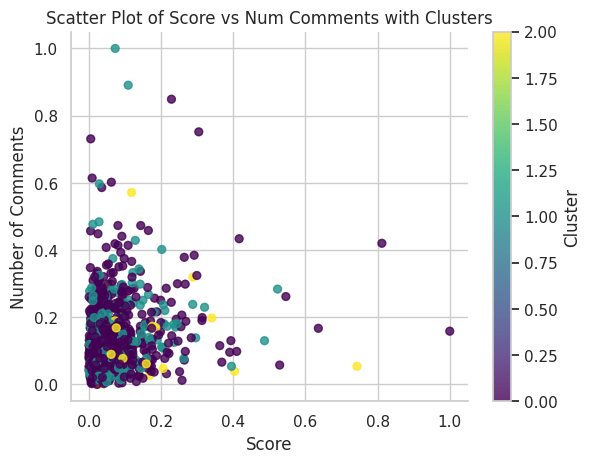

In [112]:
#Scatter Plot of Score vs Num Comments with Clusters

cluster_palette = sns.color_palette("viridis", as_cmap=True)

# Scatter plot with colored dots based on the 'cluster' column
plt.scatter(x='score', y='num_comments', c='cluster', cmap=cluster_palette, data=df, s=32, alpha=0.8)

# Customize the plot
plt.title('Scatter Plot of Score vs Num Comments with Clusters')
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the colorbar for clusters
plt.colorbar(label='Cluster')

plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


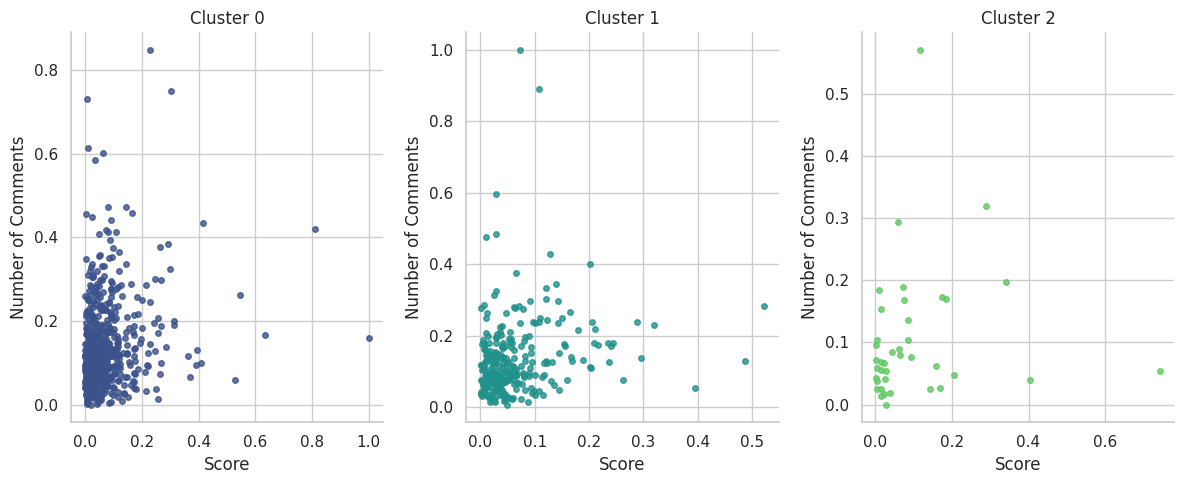

In [113]:
# 'cluster' vizualization against score and num_comments
clusters = df['cluster'].unique()

# Set the color palette for clusters
cluster_palette = sns.color_palette("viridis", n_colors=len(clusters))

# Create subplots with the number of rows equal to the number of clusters
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(12, 5))

for i, cluster_label in enumerate(clusters):
    # Scatter plot with colored dots based on the 'cluster' column for each subplot
    scatter = df[df['cluster'] == cluster_label].plot.scatter(x='score', y='num_comments', c=cluster_palette[i], ax=axes[i], s=16, alpha=0.8)

    # Customize each subplot
    axes[i].set_title(f'Cluster {cluster_label}')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Number of Comments')
    axes[i].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


### Formation of Clusters or Groups based on various factors

##### Based on Authors and Link_Flair_Text(Discussion Category)

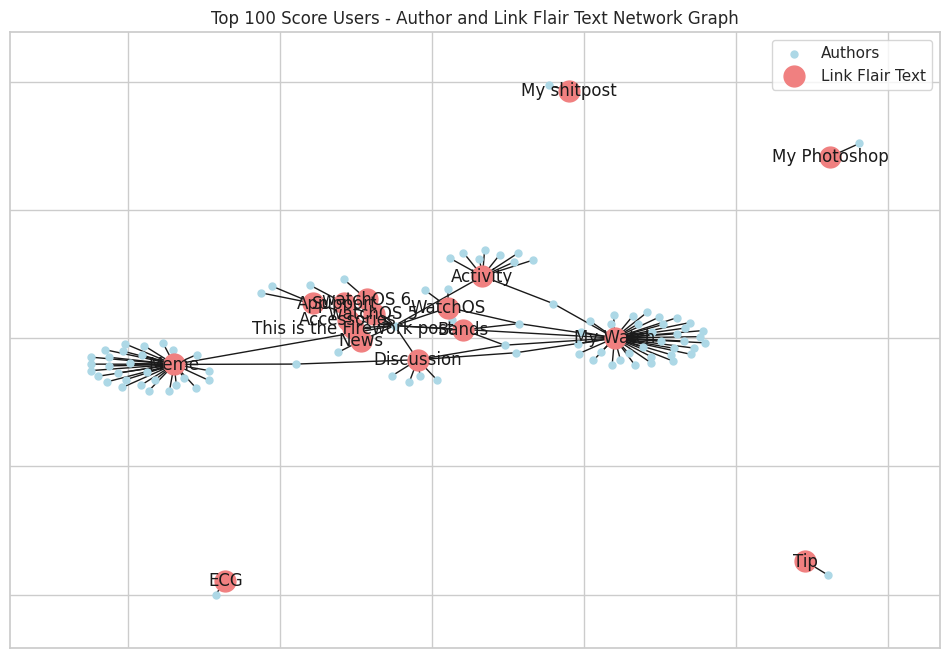

In [125]:

from itertools import combinations

# Filter to include only the top 100 users based on score
top_users = df.nlargest(100, 'score')['author']

# Filter the DataFrame and remove rows with None in 'link_flair_text'
df_top_users = df[df['author'].isin(top_users) & df['link_flair_text'].notna()]

# Create a graph
G = nx.Graph()

# Add nodes (authors and link_flair_text)
for author, link_flair_text in zip(df_top_users['author'], df_top_users['link_flair_text']):
    G.add_node(author, node_type='author')
    G.add_node(link_flair_text, node_type='link_flair_text')

# Add edges
for index, row in df_top_users.iterrows():
    G.add_edge(row['author'], row['link_flair_text'])

# Draw the graph with a larger figure size
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Create separate lists for authors and link_flair_text
authors = [node for node, data in G.nodes(data=True) if data['node_type'] == 'author']
link_flair_text = [node for node, data in G.nodes(data=True) if data['node_type'] == 'link_flair_text']

# Draw nodes with different colors and font sizes
nx.draw_networkx_nodes(G, pos, nodelist=authors, node_color='lightblue', node_size=25, label='Authors')
nx.draw_networkx_nodes(G, pos, nodelist=link_flair_text, node_color='lightcoral', node_size=225, label='Link Flair Text')

# Draw edges
nx.draw_networkx_edges(G, pos)

# Draw labels with adjusted font size for authors and link_flair_text
nx.draw_networkx_labels(G, pos, labels={node: node if data['node_type'] == 'link_flair_text' else '' for node, data in G.nodes(data=True)}, font_size=12)

plt.title('Top 100 Score Users - Author and Link Flair Text Network Graph')
plt.legend()
plt.show()


#### Highly connected authors

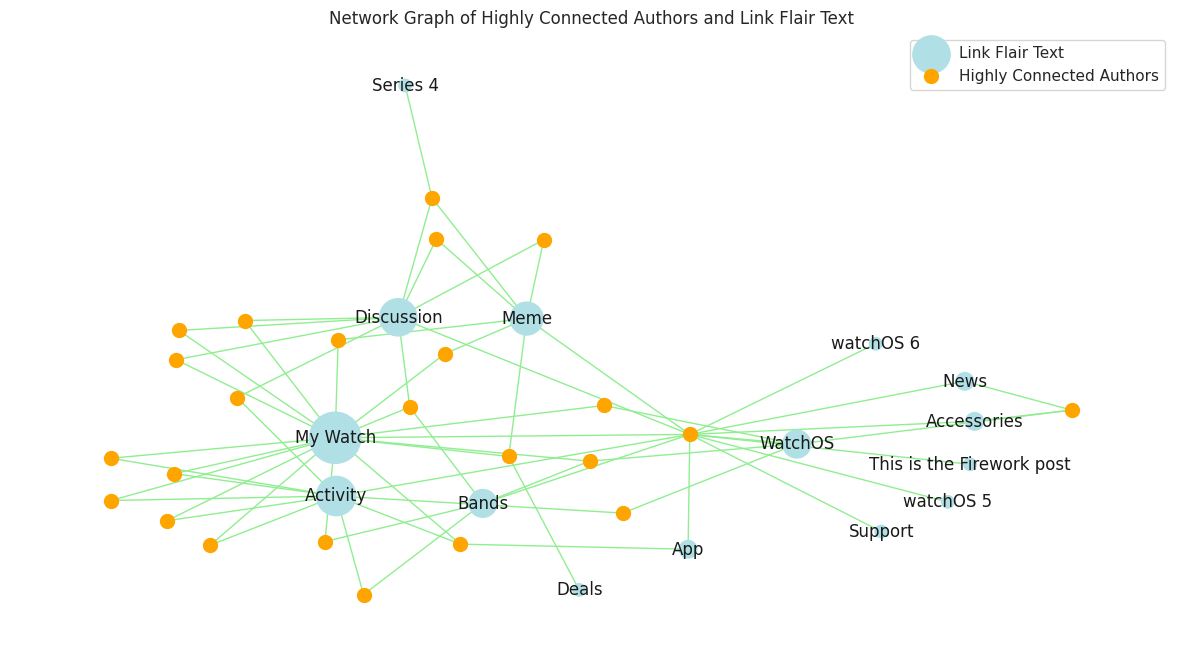

In [115]:
import networkx as nx
import matplotlib.pyplot as plt

# Drop rows with missing values in 'author' or 'link_flair_text'
df_filtered = df.dropna(subset=['author', 'link_flair_text'])

# Create the graph from the filtered dataframe
g = nx.from_pandas_edgelist(df_filtered, source='author', target='link_flair_text')

# Filter the dataframe to include only highly connected authors (degree > 1)
popular_people = [person for person in df_filtered['author'].unique() if g.degree(person) > 1]
filtered_df = df_filtered[df_filtered['author'].isin(popular_people)]

# Create the graph from the filtered dataframe
g_filtered = nx.from_pandas_edgelist(filtered_df, source='author', target='link_flair_text')

# Create a layout for nodes
layout = nx.spring_layout(g_filtered, iterations=50, scale=2)

# Get a list of unique link_flair_text values among highly connected authors
link_flairs = filtered_df['link_flair_text'].unique()

# Calculate node size for link_flair_text (scaled by degree)
flair_size = [g_filtered.degree(flair) * 80 for flair in link_flairs]

# Increase the width of the graph by setting the figure size
plt.figure(figsize=(15, 8))

# Draw network nodes for link_flair_text with circular size
node1 = nx.draw_networkx_nodes(g_filtered, layout, nodelist=link_flairs, node_size=flair_size, node_color='powderblue', label='Link Flair Text')

# Draw network nodes for highly connected authors
node2 = nx.draw_networkx_nodes(g_filtered, layout, nodelist=popular_people, node_color='orange', node_size=100, label='Highly Connected Authors')

# Draw network edges
nx.draw_networkx_edges(g_filtered, layout, width=1, edge_color="lightgreen")

# Define labels for link_flair_text
node_labels = dict(zip(link_flairs, link_flairs))

# Draw node labels
nx.draw_networkx_labels(g_filtered, layout, labels=node_labels)

# Add legend to the top right
legend_labels = {'Link Flair Text': node1, 'Highly Connected Authors': node2}
plt.legend(legend_labels.values(), legend_labels.keys(), loc='upper right')

plt.axis('off')
plt.title("Network Graph of Highly Connected Authors and Link Flair Text")
plt.show()


#### Sentiment Analysis on the Title, Text and Combined text of the reddits

In [116]:
from textblob import TextBlob


df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['text_sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['combined_text_sentiment'] = df['combined_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Classify sentiments into positive, negative, and neutral
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['title_sentiment_class'] = df['title_sentiment'].apply(classify_sentiment)
df['text_sentiment_class'] = df['text_sentiment'].apply(classify_sentiment)
df['combined_text_sentiment_class'] = df['combined_text_sentiment'].apply(classify_sentiment)

In [117]:
df

,id,author,score,upvote_ratio,num_comments,subreddit,title,text,link_flair_text,label_link_flair,...,cluster,degree_centrality,betweenness_centrality,closeness_centrality,title_sentiment,text_sentiment,combined_text_sentiment,title_sentiment_class,text_sentiment_class,combined_text_sentiment_class
0,cx5xw0,zoomfokus,0.048201,0.904762,0.283784,AppleWatch,Event confirmed!,,My Watch,13,...,0,0.001156,0.0,0.379886,0.500000,0.0,0.500000,Positive,Neutral,Positive
1,nntbf0,zekerosh,0.264055,1.000000,0.072482,AppleWatch,the future is now,,Meme,8,...,0,0.001156,0.0,0.379886,0.000000,0.0,0.000000,Neutral,Neutral,Neutral
2,jp1as2,z-angel-z,0.046021,0.904762,0.100737,AppleWatch,Lol Apple changed the Watch app icon to includ...,,Discussion,6,...,1,0.001156,0.0,0.294318,0.345455,0.0,0.345455,Positive,Neutral,Positive
3,jylhb3,yuhki0,0.013939,0.809524,0.170762,AppleWatch,"So on the day of launch of the 12 Pro Max, I a...",,Discussion,6,...,0,0.001156,0.0,0.379886,0.125000,0.0,0.125000,Positive,Neutral,Positive
4,fczvif,yuan_yy,0.011680,0.952381,0.036855,AppleWatch,Oh that’s going to be real difficult,,Activity,2,...,0,0.001156,0.0,0.379886,-0.750000,0.0,-0.750000,Negative,Neutral,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,xlbegi,17parkc,0.085656,0.904762,0.060197,AppleWatch,We're going to Candy Mountain Charlie!,,Meme,8,...,0,0.001156,0.0,0.379886,0.000000,0.0,0.000000,Neutral,Neutral,Neutral
996,11qsc10,17jde,0.044152,0.857143,0.148649,AppleWatch,Maybe the best investment I ever made! AWU,,My Watch,13,...,0,0.001156,0.0,0.379886,1.000000,0.0,1.000000,Positive,Neutral,Positive
997,voqd75,129West81stSt,0.029746,0.904762,0.078624,AppleWatch,I suffer from severe anxiety and panic attacks...,,Activity,2,...,0,0.001156,0.0,0.379886,-0.097222,0.0,-0.097222,Negative,Neutral,Negative
998,13gj5en,1017Burt,0.098038,0.904762,0.133907,AppleWatch,iPod Nano Case,,Discussion,6,...,0,0.001156,0.0,0.379886,0.000000,0.0,0.000000,Neutral,Neutral,Neutral


<ipython-input-118-3879c1077d0d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  title_plot = sns.countplot(x='title_sentiment_class', data=df, palette=colors)


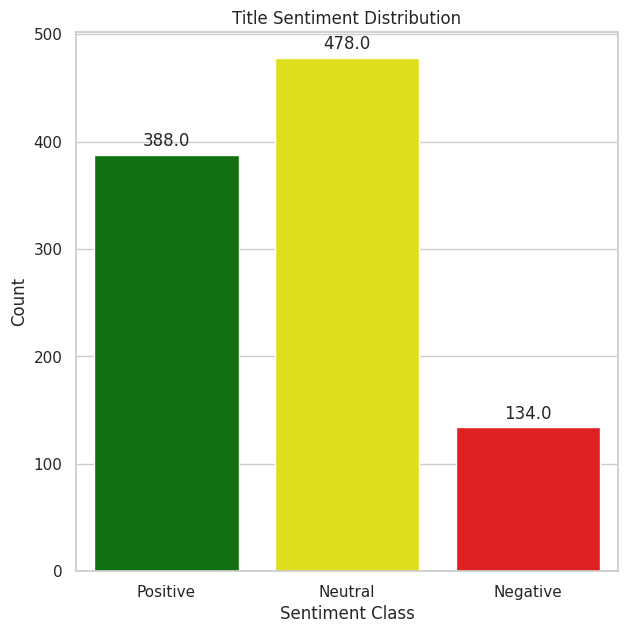

<ipython-input-118-3879c1077d0d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  text_plot = sns.countplot(x='text_sentiment_class', data=df, palette=colors)


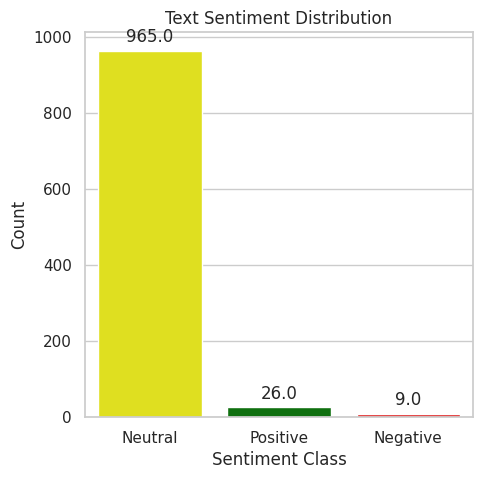

<ipython-input-118-3879c1077d0d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  combined_text_plot = sns.countplot(x='combined_text_sentiment_class', data=df, palette=colors)


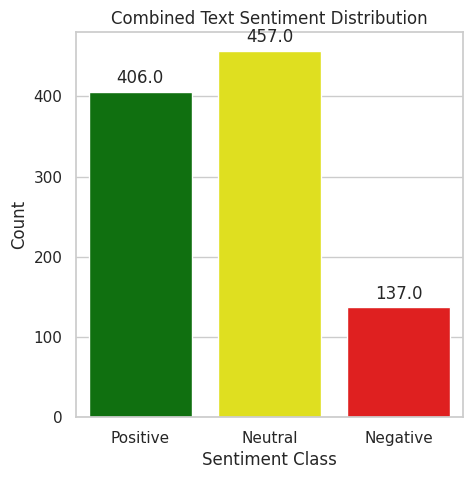

In [118]:

# Define color palette
colors = {'Positive': 'green', 'Neutral': 'yellow', 'Negative': 'red'}


# Plotting sentiment distribution for title
plt.figure(figsize=(7, 7))
title_plot = sns.countplot(x='title_sentiment_class', data=df, palette=colors)
plt.title('Title Sentiment Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')

# Display counts on top of bars
for p in title_plot.patches:
    title_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Plotting sentiment distribution for text
plt.figure(figsize=(5, 5))
text_plot = sns.countplot(x='text_sentiment_class', data=df, palette=colors)
plt.title('Text Sentiment Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')

# Display counts on top of bars
for p in text_plot.patches:
    text_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Plotting sentiment distribution for combined text
plt.figure(figsize=(5, 5))
combined_text_plot = sns.countplot(x='combined_text_sentiment_class', data=df, palette=colors)
plt.title('Combined Text Sentiment Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')

# Display counts on top of bars
for p in combined_text_plot.patches:
    combined_text_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


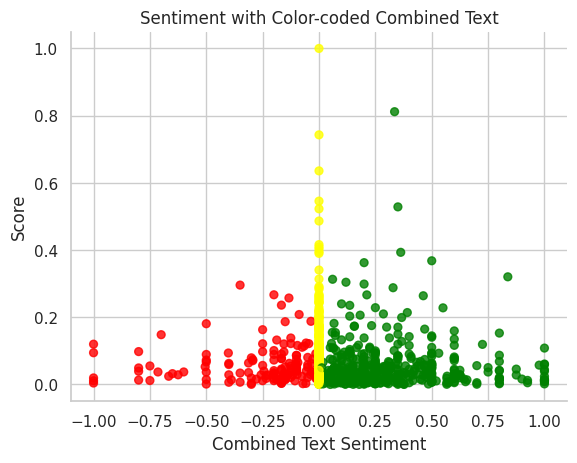

In [119]:

# Create a new column for colors based on the values of the 'combined_text' column
df['color'] = df['combined_text_sentiment'].apply(lambda x: 'green' if x > 0 else ('red' if x < 0 else 'yellow'))

# Scatter plot with colors based on the 'color' column
plt.scatter(df['combined_text_sentiment'], df['score'], c=df['color'], s=32, alpha=0.8)

# Customize the plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Combined Text Sentiment')
plt.ylabel('Score')
plt.title('Sentiment with Color-coded Combined Text')

# Show the plot
plt.show()


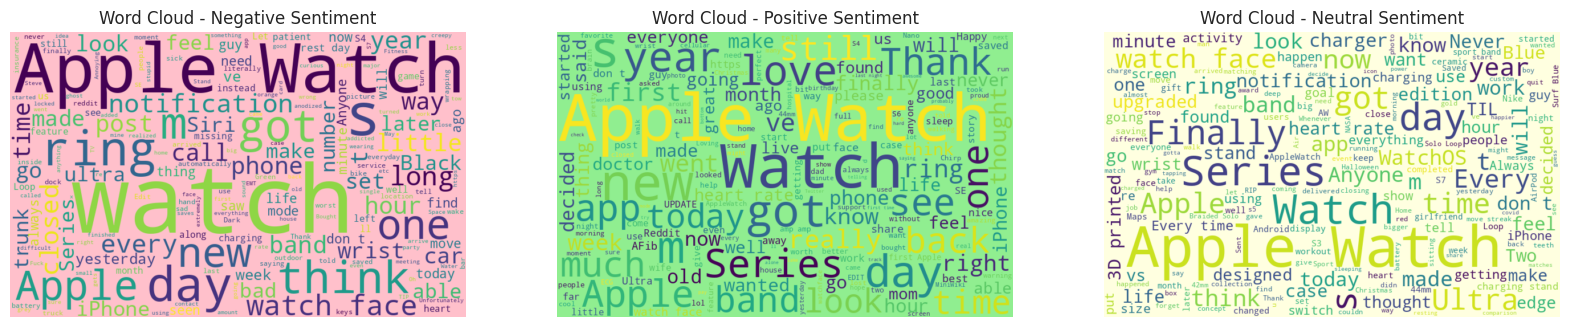

In [120]:

# Segregrate data into positive, negative and neutral sentiments
negative_text = ' '.join(df[df['combined_text_sentiment_class'] == 'Negative']['combined_text'])
positive_text = ' '.join(df[df['combined_text_sentiment_class'] == 'Positive']['combined_text'])
neutral_text = ' '.join(df[df['combined_text_sentiment_class'] == 'Neutral']['combined_text'])

# Generate word cloud for negative sentiment
wordcloud_negative = WordCloud(width=800, height=500, background_color='pink').generate(negative_text)

# Generate word cloud for positive sentiment
wordcloud_positive = WordCloud(width=800, height=500, background_color='lightgreen').generate(positive_text)

# Generate word cloud for neutral sentiment
wordcloud_neutral = WordCloud(width=800, height=500, background_color='lightyellow').generate(neutral_text)

# Plot the word clouds separately
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud - Negative Sentiment')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud - Positive Sentiment')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud - Neutral Sentiment')

plt.show()


In [121]:
df.head()

,id,author,score,upvote_ratio,num_comments,subreddit,title,text,link_flair_text,label_link_flair,...,degree_centrality,betweenness_centrality,closeness_centrality,title_sentiment,text_sentiment,combined_text_sentiment,title_sentiment_class,text_sentiment_class,combined_text_sentiment_class,color
0,cx5xw0,zoomfokus,0.048201,0.904762,0.283784,AppleWatch,Event confirmed!,,My Watch,13,...,0.001156,0.0,0.379886,0.500000,0.0,0.500000,Positive,Neutral,Positive,green
1,nntbf0,zekerosh,0.264055,1.000000,0.072482,AppleWatch,the future is now,,Meme,8,...,0.001156,0.0,0.379886,0.000000,0.0,0.000000,Neutral,Neutral,Neutral,yellow
2,jp1as2,z-angel-z,0.046021,0.904762,0.100737,AppleWatch,Lol Apple changed the Watch app icon to includ...,,Discussion,6,...,0.001156,0.0,0.294318,0.345455,0.0,0.345455,Positive,Neutral,Positive,green
3,jylhb3,yuhki0,0.013939,0.809524,0.170762,AppleWatch,"So on the day of launch of the 12 Pro Max, I a...",,Discussion,6,...,0.001156,0.0,0.379886,0.125000,0.0,0.125000,Positive,Neutral,Positive,green
4,fczvif,yuan_yy,0.011680,0.952381,0.036855,AppleWatch,Oh that’s going to be real difficult,,Activity,2,...,0.001156,0.0,0.379886,-0.750000,0.0,-0.750000,Negative,Neutral,Negative,red


In [122]:
# Save DataFrame to a CSV file
df.to_csv('post_analysis.csv', index=False)

# If you want to save it in Google Drive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Specify the path in your Google Drive where you want to save the file
file_path_in_drive = '/content/gdrive/My Drive/post_analysis.csv'

# Save DataFrame to a CSV file in Google Drive
df.to_csv(file_path_in_drive, index=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [123]:
subred_df.head()

,id,author,score,upvote_ratio,num_comments,subreddit,title,text,link_flair_text,label_link_flair,...,degree_centrality,betweenness_centrality,closeness_centrality,title_sentiment,text_sentiment,combined_text_sentiment,title_sentiment_class,text_sentiment_class,combined_text_sentiment_class,color
0,cx5xw0,zoomfokus,0.048201,0.904762,0.283784,AppleWatch,Event confirmed!,,My Watch,13,...,0.001156,0.0,0.379886,0.500000,0.0,0.500000,Positive,Neutral,Positive,green
1,nntbf0,zekerosh,0.264055,1.000000,0.072482,AppleWatch,the future is now,,Meme,8,...,0.001156,0.0,0.379886,0.000000,0.0,0.000000,Neutral,Neutral,Neutral,yellow
2,jp1as2,z-angel-z,0.046021,0.904762,0.100737,AppleWatch,Lol Apple changed the Watch app icon to includ...,,Discussion,6,...,0.001156,0.0,0.294318,0.345455,0.0,0.345455,Positive,Neutral,Positive,green
3,jylhb3,yuhki0,0.013939,0.809524,0.170762,AppleWatch,"So on the day of launch of the 12 Pro Max, I a...",,Discussion,6,...,0.001156,0.0,0.379886,0.125000,0.0,0.125000,Positive,Neutral,Positive,green
4,fczvif,yuan_yy,0.011680,0.952381,0.036855,AppleWatch,Oh that’s going to be real difficult,,Activity,2,...,0.001156,0.0,0.379886,-0.750000,0.0,-0.750000,Negative,Neutral,Negative,red


In [124]:
# Save DataFrame to a CSV file
subred_df.to_csv('extracted.csv', index=False)

# If you want to save it in Google Drive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Specify the path in your Google Drive where you want to save the file
file_path_in_drive = '/content/gdrive/My Drive/extracted.csv'

# Save DataFrame to a CSV file in Google Drive
subred_df.to_csv(file_path_in_drive, index=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
